In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [4]:
data = pd.read_csv("worlds_data.csv")

In [5]:
data

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
0,Aatrox,Middle,1,1.2%,1.2%,4.8%,100%,100%,2,2,...,46,467,-2,8.8,25.1%,377,22.1%,20.9%,0.21,0.38
1,Aatrox,Top,2,2.4%,1.2%,4.8%,50%,100%,6,2,...,14,184,-10,7.9,25.0%,260,17.5%,24.0%,0.36,0.22
2,Alistar,Support,5,6.0%,0.0%,6.0%,40%,80%,6,19,...,-44,-77,2.4,0.9,1.9%,121,7.1%,8.4%,1.96,0.34
3,Amumu,Support,1,1.2%,7.2%,8.4%,100%,0%,2,4,...,-39,446,2,0.8,1.8%,155,6.6%,8.8%,1.69,0.34
4,Annie,Middle,2,2.4%,1.2%,3.6%,50%,100%,6,6,...,-345,-457,-14,5.6,16.4%,396,20.1%,16.6%,0.6,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Yone,Middle,1,1.2%,0.0%,1.2%,0%,100%,2,3,...,58,47,1,8.3,24.8%,245,19.7%,25.5%,0.2,0.4
90,Yuumi,Support,15,18.1%,78.3%,96.4%,53%,0%,21,21,...,117,51,-8.4,0.2,1.0%,323,17.6%,9.6%,1.51,0.17
91,Ziggs,ADC,9,10.8%,7.2%,18.1%,33%,78%,21,21,...,-331,0,-6.8,9.1,31.3%,676,36.4%,24.6%,0.42,0.16
92,Zilean,Support,3,3.6%,0.0%,3.6%,67%,100%,1,4,...,10,-222,-2,1.1,2.3%,60,3.6%,9.2%,1.83,0.43


In [6]:
data.columns

Index(['Champion', 'Pos', 'GP', 'P%', 'B%', 'P+B%', 'W%', 'CTR%', 'K', 'D',
       'A', 'KDA', 'KP', 'DTH%', 'FB%', 'GD10', 'XPD10', 'CSD10', 'CSPM',
       'CS%P15', 'DPM', 'DMG%', 'GOLD%', 'WPM', 'WCPM'],
      dtype='object')

In [7]:
data['P%'] = pd.to_numeric(data['P%'])

ValueError: Unable to parse string "1.2%" at position 0

In [8]:
data = data[data.GP>3]

In [9]:
for i in data.columns:
    if i in ['GP']:
        continue
    data[i]= data[i].str.replace('%','')

<ipython-input-9-7e41014b5b93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]= data[i].str.replace('%','')


In [10]:
data['W%']

0     100
1      50
2      40
3     100
4      50
     ... 
89      0
90     53
91     33
92     67
93     64
Name: W%, Length: 94, dtype: object

In [11]:
data['P%'] = pd.to_numeric(data['P%'])

In [12]:
data.dtypes

Champion     object
Pos          object
GP            int64
P%          float64
B%           object
P+B%         object
W%           object
CTR%         object
K            object
D            object
A            object
KDA          object
KP           object
DTH%         object
FB%          object
GD10         object
XPD10        object
CSD10        object
CSPM         object
CS%P15       object
DPM          object
DMG%         object
GOLD%        object
WPM          object
WCPM         object
dtype: object

In [10]:
for i in data.columns:
    if i in ['Champion']:
        continue
    if i in ['Pos']:
        continue
    print(i)
    data[i] = pd.to_numeric(data[i])

GP
P%
B%
P+B%
W%
CTR%
K
D
A
KDA
KP
DTH%
FB%
GD10
XPD10
CSD10
CSPM
CS%P15
DPM
DMG%
GOLD%
WPM
WCPM


<ipython-input-10-f9187b041c03>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = pd.to_numeric(data[i])


In [16]:
data

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
2,Alistar,Support,5,6.0,0.0,6.0,40,80,6,19,...,-44,-77,2.4,0.9,1.9,121,7.1,8.4,1.96,0.34
5,Aphelios,ADC,31,37.3,41.0,78.3,61,48,115,63,...,128,-47,4.2,9.3,31.2,444,25.7,26.4,0.48,0.32
7,Azir,Middle,10,12.0,14.5,26.5,40,60,34,34,...,37,188,9.0,8.4,25.1,523,30.0,22.9,0.48,0.21
8,Braum,Support,11,13.3,9.6,22.9,36,100,4,38,...,-47,-75,2.5,1.1,2.3,156,9.9,8.5,1.67,0.30
9,Camille,Top,7,8.4,10.8,19.3,57,43,16,30,...,-346,-397,-19.3,7.6,24.7,340,19.7,21.2,0.40,0.23
10,Draven,ADC,4,4.8,21.7,26.5,25,50,11,8,...,166,50,4.0,9.2,30.9,317,20.5,27.9,0.64,0.33
11,Ezreal,ADC,11,13.3,9.6,22.9,55,82,42,23,...,-62,-158,-6.5,8.9,29.0,569,30.8,25.2,0.42,0.21
16,Gnar,Top,8,9.6,2.4,12.0,38,75,17,20,...,-139,-24,3.0,7.9,24.1,398,24.9,23.0,0.48,0.25
19,Gragas,Top,4,4.8,1.2,8.4,50,75,13,13,...,-267,-213,-8.8,7.6,26.2,486,27.4,21.7,0.35,0.20
21,Graves,Top,33,39.8,34.9,78.3,64,9,102,76,...,33,39,2.6,9.5,30.6,487,26.9,26.0,0.35,0.28


In [11]:
data.dtypes

Champion     object
Pos          object
GP            int64
P%          float64
B%          float64
P+B%        float64
W%            int64
CTR%          int64
K             int64
D             int64
A             int64
KDA         float64
KP          float64
DTH%        float64
FB%           int64
GD10          int64
XPD10         int64
CSD10       float64
CSPM        float64
CS%P15      float64
DPM           int64
DMG%        float64
GOLD%       float64
WPM         float64
WCPM        float64
dtype: object

In [17]:
for i in data['P%']:
    print(i)

6.0
37.3
12.0
13.3
8.4
4.8
13.3
9.6
4.8
39.8
16.9
4.8
6.0
33.7
8.4
27.7
33.7
9.6
26.5
27.7
44.6
38.6
6.0
18.1
6.0
19.3
61.4
15.7
12.0
7.2
14.5
9.6
12.0
34.9
10.8
14.5
28.9
19.3
16.9
14.5
14.5
7.2
28.9
21.7
36.1
18.1
10.8
16.9


<AxesSubplot:>

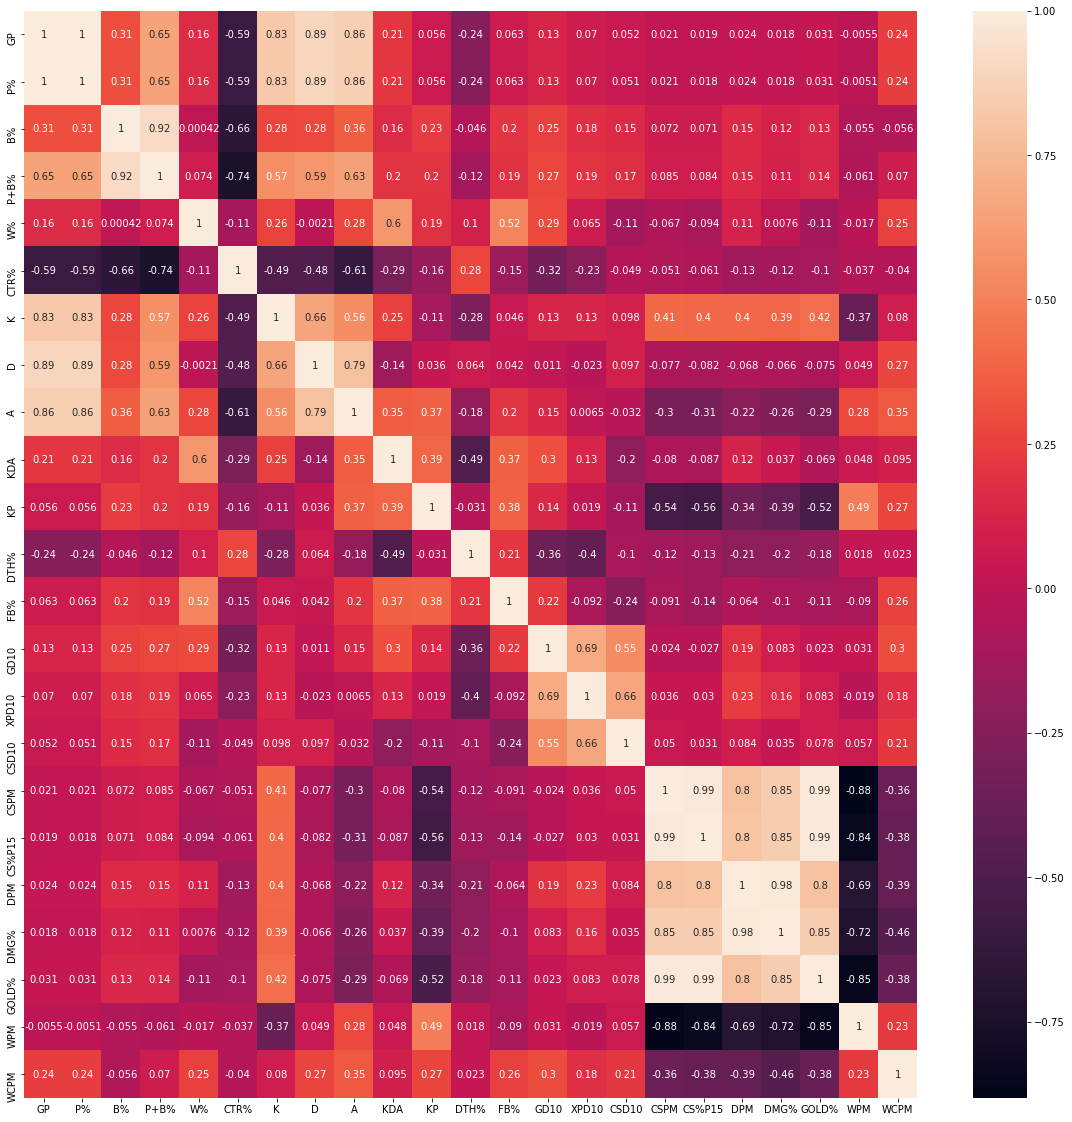

In [18]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot=True)

In [19]:
topdata = data[data.Pos == 'Top']

In [20]:
topdata

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
9,Camille,Top,7,8.4,10.8,19.3,57,43,16,30,...,-346,-397,-19.3,7.6,24.7,340,19.7,21.2,0.40,0.23
16,Gnar,Top,8,9.6,2.4,12.0,38,75,17,20,...,-139,-24,3.0,7.9,24.1,398,24.9,23.0,0.48,0.25
19,Gragas,Top,4,4.8,1.2,8.4,50,75,13,13,...,-267,-213,-8.8,7.6,26.2,486,27.4,21.7,0.35,0.20
21,Graves,Top,33,39.8,34.9,78.3,64,9,102,76,...,33,39,2.6,9.5,30.6,487,26.9,26.0,0.35,0.28
22,Gwen,Top,14,16.9,10.8,27.7,29,50,36,34,...,-28,-3,1.7,8.7,27.6,415,26.1,24.9,0.33,0.32
24,Irelia,Top,5,6.0,54.2,65.1,20,80,7,25,...,-472,-364,-4.2,8.4,29.2,264,18.3,24.6,0.38,0.17
27,Jax,Top,7,8.4,0.0,8.4,43,86,18,23,...,-1,130,0.7,8.2,25.9,345,20.5,24.3,0.39,0.16
28,Jayce,Top,23,27.7,27.7,55.4,43,22,73,83,...,378,157,9.3,8.6,27.9,626,34.2,25.6,0.41,0.29
34,Kennen,Top,22,26.5,34.9,61.4,73,50,94,74,...,-201,-122,-4.5,7.5,24.2,510,27.7,21.9,0.33,0.23
41,Lucian,Top,5,6.0,54.2,78.3,60,80,21,16,...,626,367,13.2,8.7,28.9,591,27.7,25.7,0.54,0.33


<AxesSubplot:xlabel='Champion'>

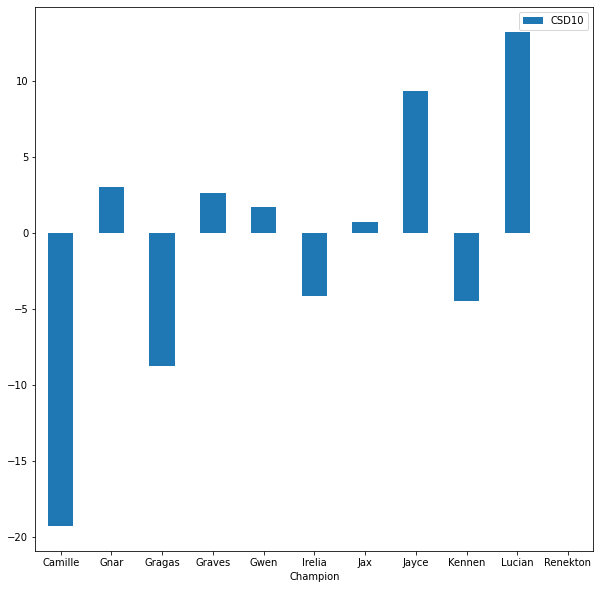

In [21]:
topdata.plot.bar(x='Champion',y='CSD10',rot=0, figsize=(10,10), fontsize=10)

<AxesSubplot:>

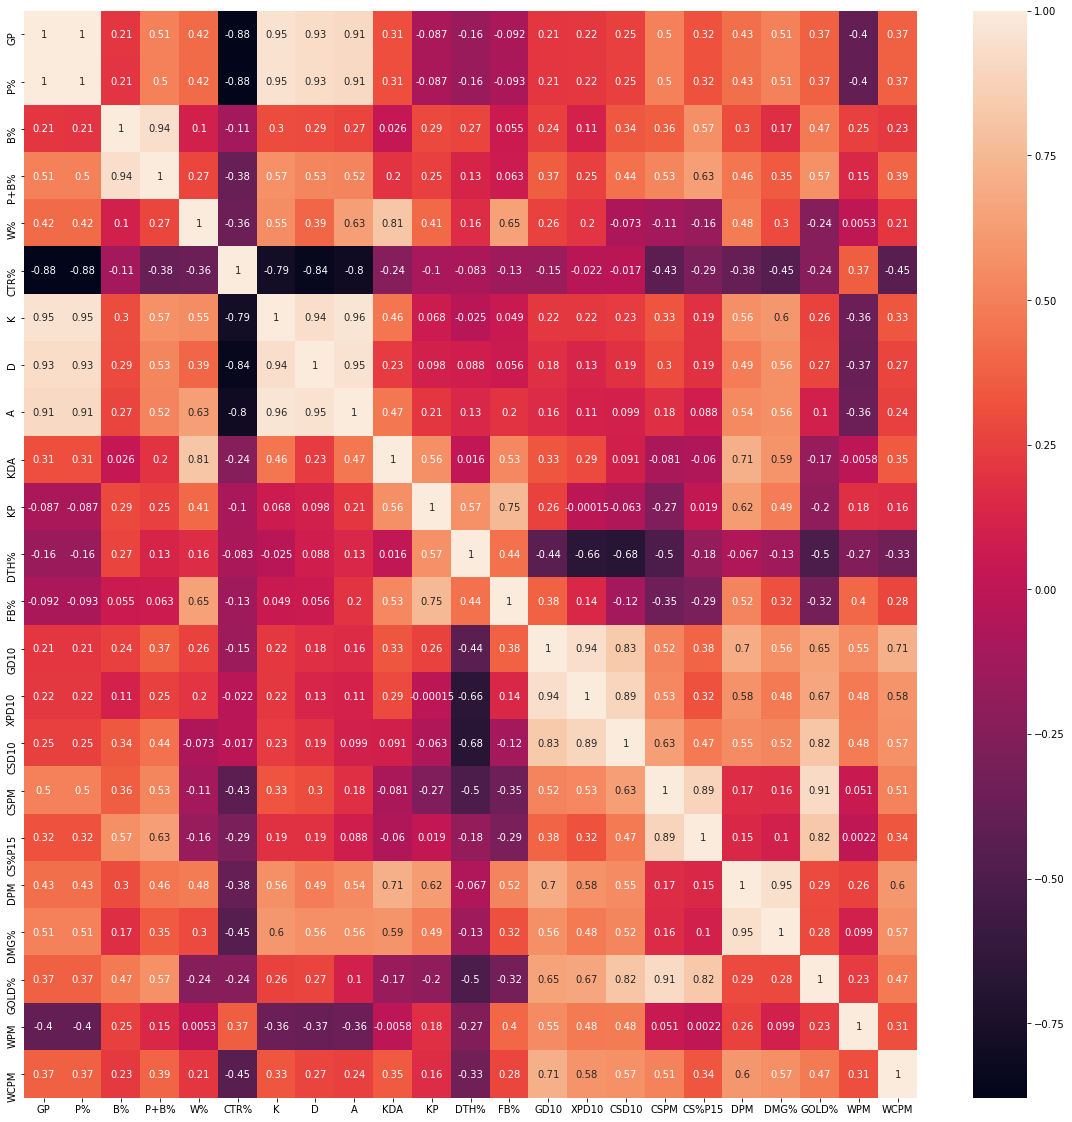

In [22]:
plt.figure(figsize = (20,20))
sns.heatmap(topdata.corr(),annot=True)

In [24]:
!pip install lightgbm

In [113]:
from lightgbm import LGBMRegressor

In [36]:
column = ['P%', 'B%', 'P+B%','CTR%', 'KDA', 'GD10', 'XPD10', 'CSD10','DPM', 'WPM', 'WCPM']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(data[column],data['W%'], test_size = 0.2, random_state=156)

In [140]:
lgbm_wrapper = LGBMRegressor(objective= "regression",
                          max_depth= 5,
                          n_estimators= 100,
                          learning_rate= 0.001,
                          num_leaves = 31)

In [141]:
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric=['rmse'], eval_set=evals, verbose=True)

ValueError: Expected 2D array, got 1D array instead:
array=[33 73 70 50 61 64 64 59 43 55 40 62 53 63 50 50 58 56 34 64 33 25 54 50
 60 57 80 60 25 40 46 38 29 56 50 56 20 33].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [119]:
preds = lgbm_wrapper.predict(X_test)
preds

array([50.36842105, 50.36842105, 50.36842105, 50.36842105, 50.36842105,
       50.36842105, 50.36842105, 50.36842105, 50.36842105, 50.36842105])

In [108]:
pred_proba

array([[0.02631579, 0.05263158, 0.02631579, 0.07894737, 0.02631579,
        0.02631579, 0.05263158, 0.02631579, 0.02631579, 0.13157895,
        0.02631579, 0.02631579, 0.02631579, 0.07894737, 0.02631579,
        0.02631579, 0.02631579, 0.05263158, 0.02631579, 0.02631579,
        0.02631579, 0.07894737, 0.02631579, 0.02631579, 0.02631579],
       [0.02631579, 0.05263158, 0.02631579, 0.07894737, 0.02631579,
        0.02631579, 0.05263158, 0.02631579, 0.02631579, 0.13157895,
        0.02631579, 0.02631579, 0.02631579, 0.07894737, 0.02631579,
        0.02631579, 0.02631579, 0.05263158, 0.02631579, 0.02631579,
        0.02631579, 0.07894737, 0.02631579, 0.02631579, 0.02631579],
       [0.02631579, 0.05263158, 0.02631579, 0.07894737, 0.02631579,
        0.02631579, 0.05263158, 0.02631579, 0.02631579, 0.13157895,
        0.02631579, 0.02631579, 0.02631579, 0.07894737, 0.02631579,
        0.02631579, 0.02631579, 0.05263158, 0.02631579, 0.02631579,
        0.02631579, 0.07894737, 0.02631579, 0.

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

In [117]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\ F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test,preds)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].